# Telco Custumer Churn

Neste projeto irei construir um modelo de machine learnig para prever a possibilidade de um cliente cancelar o contrato com uma operadora de telecomunicações. Trata-se de um problema de aprendizado supervisionado (utilizando um conjunto de dados rotulado) de classificação, em que o alvo (target) é 1 se o cliente cancelou o serviço e 0 caso contrário.

Pipiline de resolução usado no projeto(baseado no CRISPIM-DM)
1. Definir o problema de negócio.

2. Coletar os dados e obter uma visão geral deles.

3. Dividir os dados em conjuntos de treino e teste.

4. Explorar os dados (Análise Exploratória de Dados – EDA).

5. Engenharia de atributos, limpeza e pré-processamento dos dados.

6. Treinamento dos modelos, comparação, seleção de atributos e ajuste de hiperparâmetros.

7. Teste final do modelo em produção e avaliação.

8. Conclusão e interpretação dos resultados do modelo.

9. Implantação (deploy).


Neste notebook, realizarei a análise exploratória de dados (EDA), contemplando as etapas 1 a 4 do pipeline apresentado acima. O principal objetivo desta fase é identificar padrões e insights que forneçam informações valiosas sobre o comportamento dos clientes que cancelam o serviço (churners), com base nas variáveis disponíveis.




## 1. Business problem and project objective

### 1.1 Qual é o problema do negócio?
  Uma empresa de telecomunicações apresenta uma taxa considerável de rotatividade de clientes. Atualmente, diversos consumidores estão trocando os serviços oferecidos pela companhia pelos da concorrência. Seria de grande valor estratégico se a operadora conseguisse prever quais clientes estão em risco de cancelar seus contratos nos próximos meses.

### 1.2 Entendimento do Problema
  A rotatividade de clientes (*Churn Rate*) é um dos maiores desafios no setor de telecomunicações. Mesmo uma taxa de perda de 1% pode significar prejuízos milionários quando aplicada a uma base massiva de usuários.
  
  O objetivo central deste projeto não é apenas calcular o churn, mas antecipá-lo. Buscamos responder: **quais clientes têm alta probabilidade de cancelamento no curto prazo?**
  
  Ao identificar padrões ocultos de comportamento — muitas vezes antes que o próprio cliente tome a decisão consciente de sair — a empresa pode substituir estratégias genéricas por ações de retenção cirúrgicas, focadas exclusivamente nos perfis de alto risco, otimizando o orçamento de marketing e preservando a receita.

### 1.3 Contexto do negócio: KPIs Importantes
  Para entender o impacto financeiro do problema, analisamos os seguintes indicadores de performance (KPIs) de Custo e Eficiência de Aquisição:
  
  * **CAC (Customer Acquisition Cost):** Talvez o mais importante. Mede o total investido em marketing, publicidade, comissões de vendas e sistemas, dividido pelo número de novos clientes conquistados em um determinado período.
  * **LTV (Lifetime Value):** Estima a receita total que um cliente trará para a empresa durante todo o tempo em que permanecer como assinante.
  * **ARPU (Average Revenue Per User):** Avalia o valor médio mensal gerado por cada novo cliente, essencial para calcular o potencial de retorno.
  * **Churn Rate (Taxa de Cancelamento) Inicial:** Monitora se os novos clientes estão cancelando logo após a assinatura, o que pode indicar problemas no processo de vendas.

> **Por que estes KPIs são importantes para Telecom?**
> O mercado de telecomunicações é extremamente competitivo, com altos custos de infraestrutura e aquisição. Monitorar o CAC e o LTV é fundamental para garantir que a empresa não esteja gastando mais para adquirir um cliente do que o valor que ele gera a longo prazo.

### 1.4 Objetivos do Projeto
  * Identificar os principais fatores e variáveis envolvidos no churn.
  * Construir um modelo de Machine Learning capaz de prever quais clientes cancelarão o serviço.
  * Promover insights para ações direcionadas de redução da taxa de churn.

### 1.5 Benefícios do Projeto
  * Retenção de clientes
  * Proteção de receita
  * Serviço personalizado 
  * Marketing Otimizado 
  * Inteligência de Negócio



# Importando as bibliotecas 

In [1]:
# Visualização e manipulação do dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split

## 2. Entendendo os dados 

Está base de dados pode ser encontrada em: https://www.kaggle.com/code/emineyetm/telco-customer-churn

Original de: https://community.ibm.com/community/user/blogs/steven-macko/2019/07/11/telco-customer-churn-1113


In [2]:
data_patch = '../data/WA_Fn-UseC_-Telco-Customer-Churn.xls'

df = pd.read_csv(data_patch)


In [3]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
df.tail(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Dicionário: 

**customerID** – identificador único do cliente

**gender** – indica se o cliente é do sexo masculino ou feminino

**SeniorCitizen** – indica se o cliente é idoso ou não (1 = sim, 0 = não)

**Partner** – indica se o cliente possui um(a) parceiro(a) (Sim, Não)

**Dependents** – indica se o cliente possui dependentes (Sim, Não).
Um dependente é uma pessoa que depende de outra como principal fonte de renda.

**tenure** – número de meses que o cliente permaneceu na empresa

**PhoneService** – indica se o cliente possui serviço de telefone (Sim, Não)

**MultipleLines** – indica se o cliente possui múltiplas linhas telefônicas (Sim, Não, Sem serviço de telefone)

**InternetService** – provedor de serviço de internet do cliente (DSL, Fibra óptica, Nenhum)

**OnlineSecurity** – indica se o cliente possui segurança online (Sim, Não, Sem serviço de internet)

**OnlineBackup** – indica se o cliente possui backup online (Sim, Não, Sem serviço de internet)

**DeviceProtection** – indica se o cliente possui proteção de dispositivos (Sim, Não, Sem serviço de internet)

**TechSupport**– indica se o cliente possui suporte técnico (Sim, Não, Sem serviço de internet)

**StreamingTV** – indica se o cliente possui serviço de streaming de TV (Sim, Não, Sem serviço de internet)

**StreamingMovies** – indica se o cliente possui serviço de streaming de filmes (Sim, Não, Sem serviço de internet)

**Contract** – tipo de contrato de acordo com a duração (Mensal, Anual, Bienal)

**PaperlessBilling** – indica se as faturas são emitidas de forma digital (Sim, Não)

**PaymentMethod** – método de pagamento utilizado pelo cliente
(Cheque eletrônico, Cheque enviado pelo correio, Cartão de crédito (automático), Transferência bancária (automática))

**MonthlyCharges** – valor cobrado mensalmente pelo serviço

**TotalCharges** – valor total acumulado cobrado durante o período de assinatura (tenure)

Informações do dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
print(f"O dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas")

O dataset tem 7043 linhas e 21 colunas


Irei transformar a coluna "TotalCharges" para o tipo float64, pois o mesmo é composta por dados númericos 

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
#procurando por valores nulos 
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

* Irei substituir os valores nulos de "TotalCharges" por zero, pois os mesmo são referentes aos clientes que ainda não completaram um mês de serviço. 

In [9]:
df.loc[df['tenure'] == 0, 'TotalCharges'] = 0

In [10]:
df.describe(include = "all").T  

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Alguns insigts: 

* A quantidade de clientes que são ou não são idosos apresenta uma variação alta, indicando que existe um público denso de pessoas abaixo dos 60.
* Consíderavel parte dos clientes tem dependentes e são casados
* Um pouco mais da metade dos clientes não utilizaos serviçoes oferecidos pela empresa como segurança online, backup, suporte técnico e etc
* A quantidae de messes que um cliente permanece na empresa tem uma variação moderada, o que pode indicar falha na retenção de clientes em algunn seguimentos.
* A grande maioria dos clientes emite notas fiscais digitais, porém uma parte imprimi as notas.
* A maioria dos clientes pagam o valor de 75.35 mensais, pórem alguns clientes pagam 118.75, o é que quase o dobro da média.
* A média do TotalCharges (2279) é bem maior que a mediana (1394). Isso indica uma assimetria positiva (à direita). Temos poucos clientes que gastam muito (perto do máximo de 8684), o que puxa a média para cima.

In [11]:
#procurando valores duplicados 
df.duplicated().sum()

np.int64(0)

Irei remover algumas tabelas, cujos valores não contribuem de forma significativa para a análise, transformar as colunas que estão com objetos em catégorias e padronizar o nome das colunas (tenure e gender)

In [12]:
df = df.drop('customerID', axis=1)


In [13]:
#padronizando nomes das colunas
df = df.rename(columns={'gender' : 'Gender', 
                        'tenure' : 'Tenure' })

In [14]:
#modificando tipos das colunas 
categorical_columns = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn',
    'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 
    'Gender', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'SeniorCitizen'
]

for col in categorical_columns:
    if col in df.columns:  
        df[col] = df[col].astype('category')

In [15]:
print(df[categorical_columns].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Partner           7043 non-null   category
 1   Dependents        7043 non-null   category
 2   PhoneService      7043 non-null   category
 3   PaperlessBilling  7043 non-null   category
 4   Churn             7043 non-null   category
 5   MultipleLines     7043 non-null   category
 6   InternetService   7043 non-null   category
 7   Contract          7043 non-null   category
 8   PaymentMethod     7043 non-null   category
 9   Gender            7043 non-null   category
 10  OnlineSecurity    7043 non-null   category
 11  OnlineBackup      7043 non-null   category
 12  DeviceProtection  7043 non-null   category
 13  TechSupport       7043 non-null   category
 14  StreamingTV       7043 non-null   category
 15  StreamingMovies   7043 non-null   category
 16  SeniorCitizen     7043 n

## 3. Separando os dados entre treino e teste (Split)

* Irei separar os dados de treino e teste antes do EDA para evitar DataLekage, e garantir a capacidade de generalização do modelo
  

In [16]:
X = df.drop(columns=['Churn'])
y = df['Churn'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state= 42)

print(f"Treino: {X_train.shape[0]} amostras | Teste: {X_test.shape[0]} amostras")

Treino: 5634 amostras | Teste: 1409 amostras


In [17]:
print(f"Treino: {y_train.value_counts(normalize = True)}")
print(f"Teste: {y_test.value_counts(normalize = True)}")

Treino: Churn
No     0.734647
Yes    0.265353
Name: proportion, dtype: float64
Teste: Churn
No     0.734564
Yes    0.265436
Name: proportion, dtype: float64


* as proporções de treino e teste foram mantidas. 

## 4. Análise Exploratória de Dados

Explorarei o conjunto de treinamento com o objetivo de compreender a distribuição individual das variáveis, bem como identificar relações, correlações, padrões e tendências presentes nos dados. Nessa etapa, buscarei extrair insights relevantes, especialmente em relação à variável alvo (Churn).

Para isso, realizarei análises univariadas, bivariadas e multivariadas. Além disso, utilizarei um conjunto de dados completo — contendo as variáveis preditoras e a variável alvo — para empregar o parâmetro hue nas visualizações com a biblioteca seaborn e analisar a matriz de correlação.

In [18]:
#definindo paleta de cores

%matplotlib inline

mpl.style.use('ggplot') 

mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['figure.dpi']          = 150
mpl.rcParams['axes.grid']           = True
mpl.rcParams['font.size']           = 12

churn_palette = [
    '#442F73',  # Roxo Escuro (Base/Retenção)
    '#F2BB13',  # Amarelo Ouro (Alerta/Churn)
    '#A56DA6',  # Roxo Médio (Categorias secundárias)
    '#F2D16D',  # Amarelo Claro (Detalhes de atenção)
    '#F2C2DC'   # Rosa Pastel (Elementos de suporte)
]

# Setting as the palette
sns.set_palette(sns.color_palette(churn_palette))
# Display
sns.color_palette(churn_palette)

[(0.26666666666666666, 0.1843137254901961, 0.45098039215686275),
 (0.9490196078431372, 0.7333333333333333, 0.07450980392156863),
 (0.6470588235294118, 0.42745098039215684, 0.6509803921568628),
 (0.9490196078431372, 0.8196078431372549, 0.42745098039215684),
 (0.9490196078431372, 0.7607843137254902, 0.8627450980392157)]

In [19]:
df_train = pd.concat([X_train, y_train], axis = 1)

df_train.head(3)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3738,Male,0,No,No,35,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,No
3151,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,No
4860,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,No


Vou seperar os dados catégoricos dos númericos, para analisar os mesmo separadamente. 

In [20]:
numerical_features = X_train.select_dtypes('number').columns.tolist()
categorical_features = X_train.select_dtypes('category').columns.tolist()

target = 'Churn'

print(f"Análise de Estrutura:")
print(f"--- Numericas ({len(numerical_features)}): {numerical_features}")
print(f"--- Categóricas ({len(categorical_features)}): {categorical_features}")
print(f"--- Alvo: {target}")


Análise de Estrutura:
--- Numericas (3): ['Tenure', 'MonthlyCharges', 'TotalCharges']
--- Categóricas (16): ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
--- Alvo: Churn


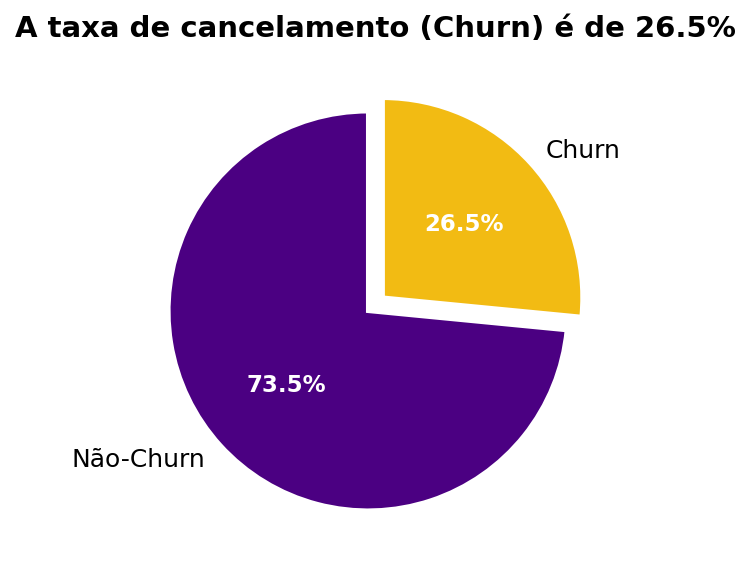

In [21]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(4,4))

colors = [ '#4B0082', '#F2BB13'] 

patches, texts, autotexts = ax.pie(churn_rate, labels=['Não-Churn', 'Churn'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0),colors=colors, pctdistance=0.55, 
wedgeprops={'edgecolor': 'white', 'linewidth': 2})

plt.setp(autotexts, size=11, weight="bold", color="white")
plt.setp(texts, size=12)

ax.set_title('A taxa de cancelamento (Churn) é de 26.5%', fontweight='bold',fontsize=14)
ax.axis("equal") 

plt.tight_layout()
plt.show()

A variável alvo (Churn), está desbalanceado. Irei utilizar, mais adiantes,  algumas técnicas para contornar a situação:
* Hold-out estratificado e validação cruzada k-fold estratificada, com o intuito de manter a proporção nos dados de treino e teste.
* Ajustar pesos das classes, irei atribuir pesos maiores para a classe minoritaria. Fazendo isso, o modelo ira entender que é mais custoso indicar erroneamente um churner.
* Analisar o trade-off entre precisão e recall, se necessário. Como as classes não estão balanceadas a acurácia não é a melhor estratégia. Lembrando que o objetivo do projeto não é apenas uma classificação binária, mas é prever a probabilidade de um cliente permanecer ou não. 

## Distribuição das variávies númericas 

Agora irei analisar as distribuições das variáviess númericas, procurando identificar se existem distruições assimétricas e quais são os valores mais comuns entre as variáveis 

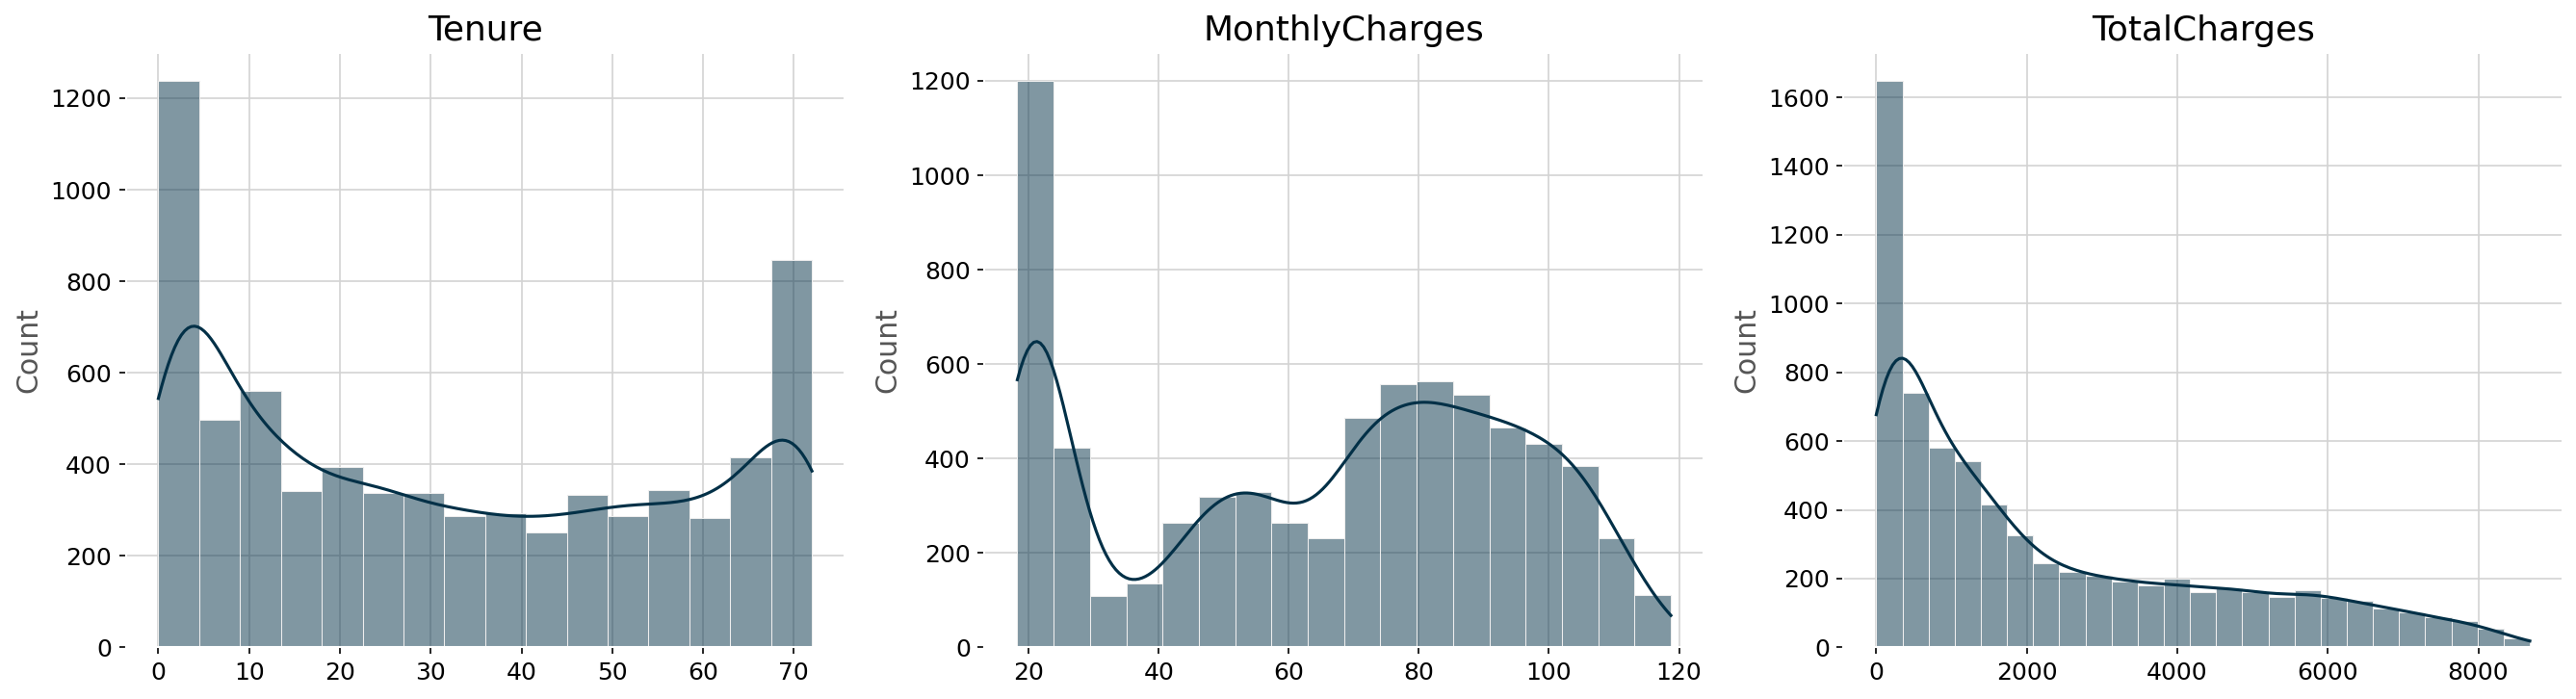

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
axes_list = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(data=df, x=col, kde=True, ax=axes_list[i], color='#023047')
    
    axes_list[i].set_title(f'{col}')
    axes_list[i].set_xlabel('')

#ajuste para os títulos não baterem nos gráficos de cima
plt.tight_layout()
plt.show()


Insigths

* A distribuição de Tenure é nitidamente bimodal: há um volume alto de novos clientes, mas também um grupo significativo de clientes de longo prazo (fidelizados). Entre esses dois extremos, a distribuição é variada, sugerindo diferentes momentos de retenção.
* A distribuição das cobranças mensais revela dois perfis de consumo predominantes. Existe um pico expressivo no valor mínimo (planos de entrada), seguido por uma concentração na faixa de 70 a 90 (planos premium). A presença de um "vale" na faixa intermediária (40 a 60) sugere uma oportunidade de negócio: a empresa pode estar falhando em oferecer planos medianos atrativos ou em realizar o upsell dos clientes básicos para categorias intermediárias.
*  O gráfico de Total Charges apresenta uma assimetria positiva (à direita), o que é esperado, visto que esta variável é o produto de Tenure×MonthlyCharges. Como há um grande volume de clientes recentes (baixo Tenure), a receita acumulada concentra-se em valores baixos. Para elevar o Valor Vitalício (LTV - Lifetime Value) deste cliente, a empresa deve focar em estratégias de retenção, garantindo que o cliente permaneça tempo suficiente para migrar para a cauda direita do gráfico.

## Outiliers 

Dando continuidade à análise das distribuições, utilizarei o Box Plot para validar se as caudas longas observadas nos histogramas (especialmente em TotalCharges) representam outliers estatísticos ou apenas a variabilidade natural do negócio. Esta técnica, baseada no Intervalo Interquartil (IQR), permitirá distinguir entre ruídos (como erros de input) e casos extremos genuínos, fundamentando a escolha entre a remoção ou a manutenção desses registros para a modelagem

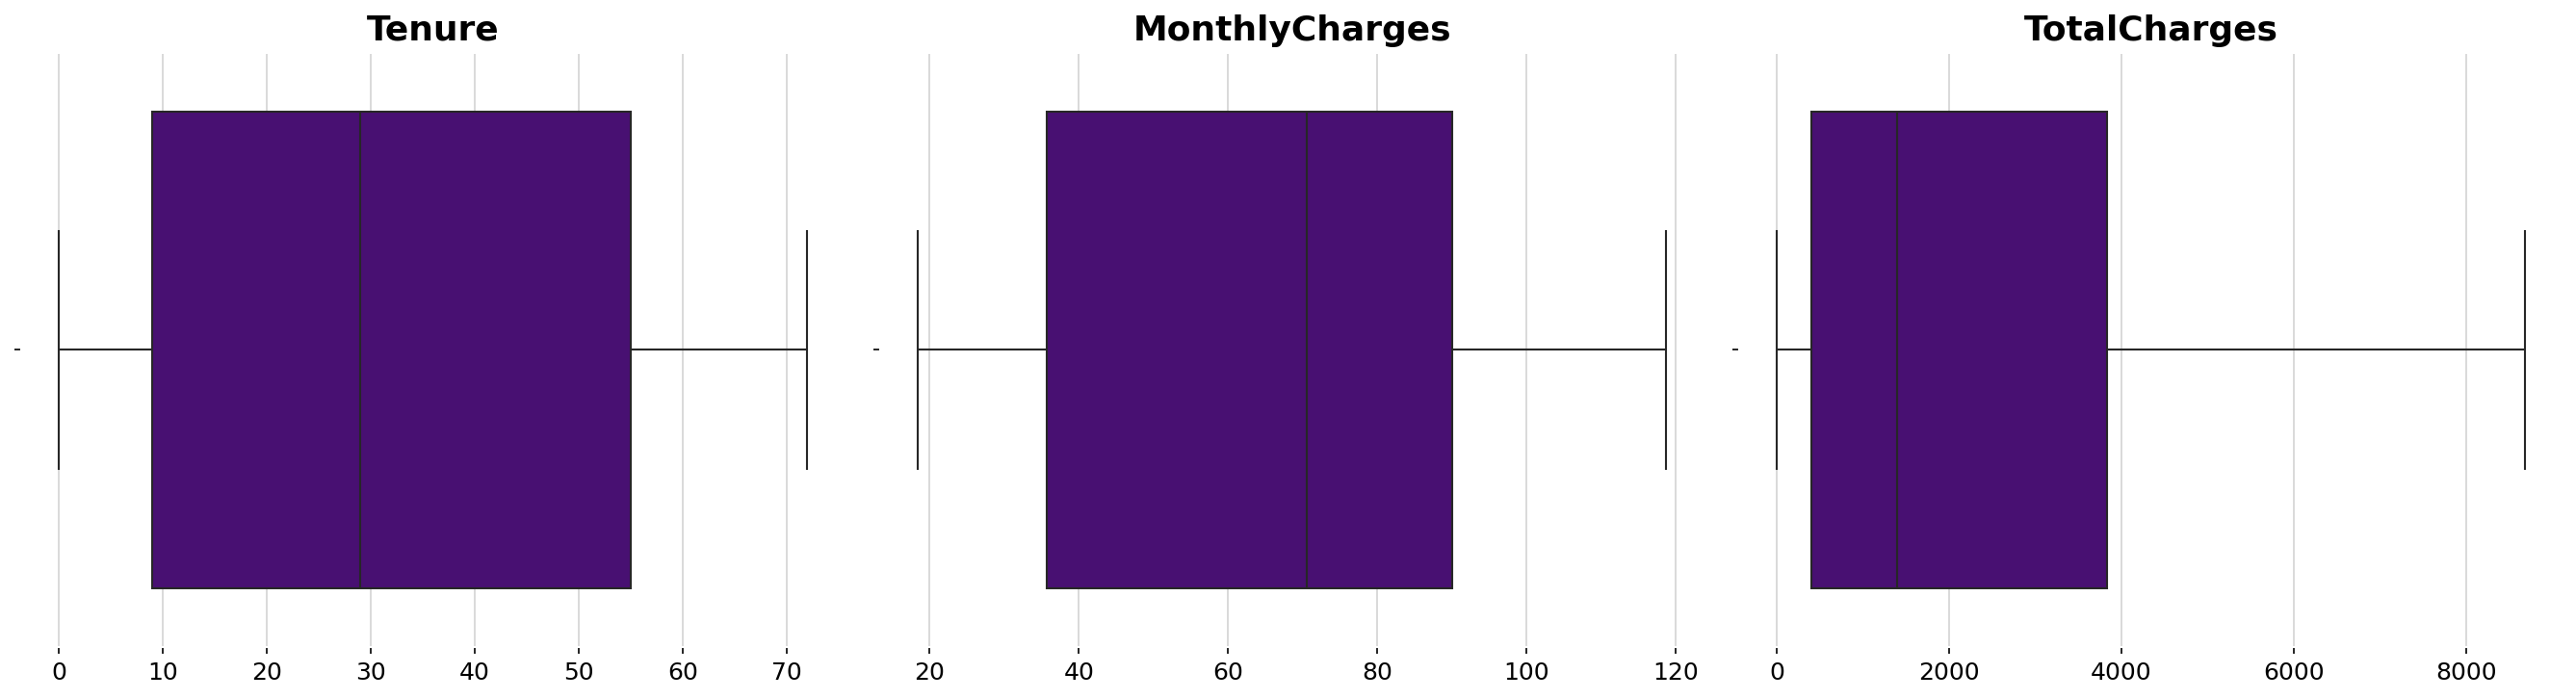

In [23]:
figs, axes = plt.subplots(1, len(numerical_features), figsize = (18, 5))

for i, col in enumerate(numerical_features):
    sns.boxplot(data = df_train, x=col, ax=axes[i], color ='#4B0082' , fliersize = 5)
    axes[i].set_title(f'{col}', fontweight = 'bold')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

* A ausência de outliers nas variáveis numéricas sugere que os dados de cobrança, tempo de permanência e total de receita gerada estão dentro de limites operacionais esperados, sem erros de digitação óbvios ou casos extremos que necessitem de remoção para o treinamento do modelo.

## Distribuição das variáveis categóricas 

Nesse momemento, irei analisar as variáveis catégoricas para identificar quais são os comportamentso mais comuns entre os clientes da empresa. Procurando identificar como eles fazem uso dos béneficios oferecidos pela empresa. 
Irei remover também as colunas Gender,- pois não apresentou uma variação capaz de gerar valores para a análise- e Churn -pois  é a variávela alvo. 

In [24]:
remover = ['Gender', 'Churn']

# Criando a lista nova sem esses nomes
categorical_features = [col for col in categorical_features if col not in remover]

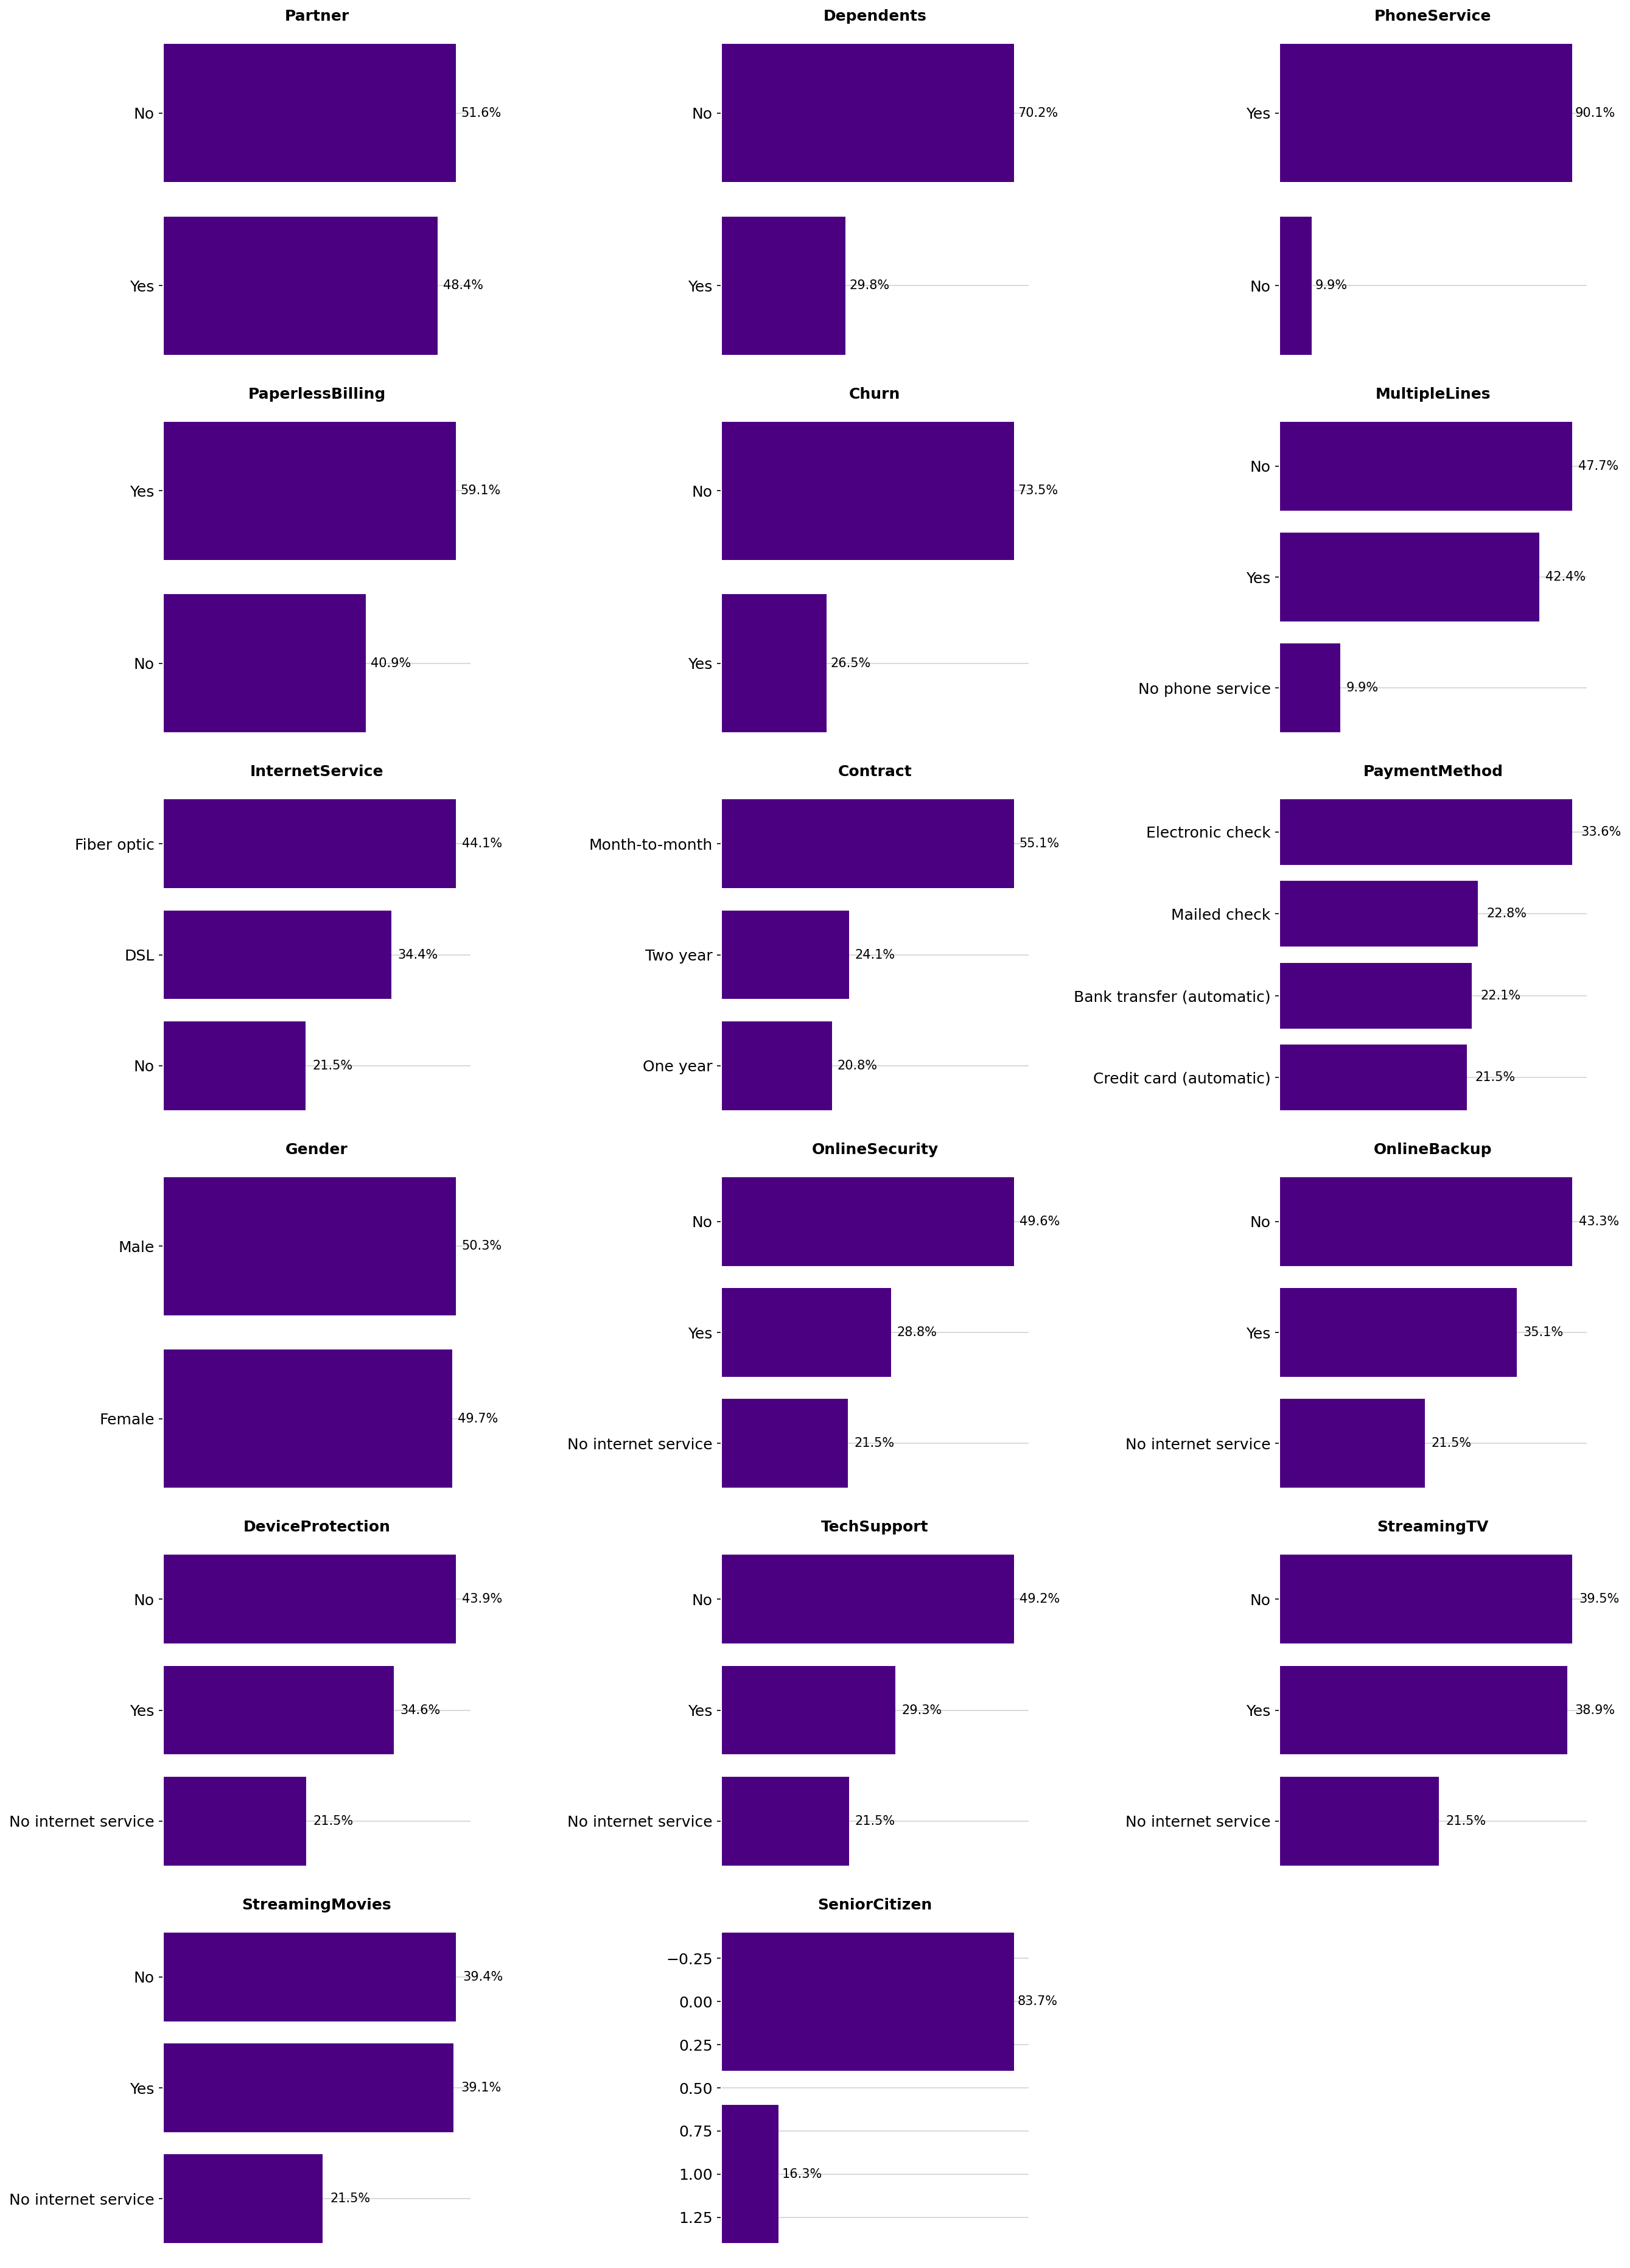

In [25]:

#PS: Implementar depois uma lógica depois para identificar automaticamente a quantidade de linha e colunas
fig, axes = plt.subplots(nrows = 6, ncols= 3, figsize = (18,25))

axes_list = axes.flatten()

for i, col in enumerate(categorical_columns):
    df_pct = df_train[col].value_counts(normalize = True).mul(100).round(1)

    bars = axes_list[i].barh(df_pct.index, df_pct.values, color = '#4B0082')
    
    
    axes_list[i].set_title(col, fontweight ='bold', fontsize=12)
    axes_list[i].invert_yaxis() #coloca a categória com mais dados no topo


    for bar in bars:
        width = bar.get_width()
        axes_list[i].text(width + 1, bar.get_y() + bar.get_height()/2, f'{width}%', va= 'center', fontsize= 10 )
    
    axes_list[i].spines['top'].set_visible(False)
    axes_list[i].spines['right'].set_visible(False)
    axes_list[i].spines['bottom'].set_visible(False)
    axes_list[i].get_xaxis().set_visible(False)

for j in range(i + 1, len(axes_list)):
    fig.delaxes(axes_list[j])

plt.tight_layout()
plt.show()

    

Insights:

* A base apresenta uma alta exposição ao risco, com 55.1% dos clientes em contratos mensais. Este modelo de contratação é historicamente associado a altas taxas de churn devido à baixa barreira de saída
* Há uma baixa penetração em serviços críticos como Segurança Online (28.8% de adesão) e Suporte Técnico (29.3%). A subutilização desses serviços pode indicar uma falha na percepção de valor ou na qualidade da oferta, impactando diretamente a retenção.
* Embora a maioria utilize faturamento digital (59.1%), uma parcela significativa (22.8%) ainda utiliza pagamentos via correio. É fundamental cruzar esse dado com a variável de churn para entender se métodos não automatizados estão gerando atrito na experiência do cliente.
* Cerca de 29.8% dos clientes possuem dependentes. Este segmento costuma apresentar maior estabilidade (menor churn); validar se esse comportamento se repete nesta base é essencial para estratégias de fidelização familiar.
* Embora os serviços de Streaming (TV e Filmes) possuam alta adesão (~39% cada), é imperativo validar se o consumo desses produtos atua como um fator de proteção contra o Churn. Caso identifiquemos uma correlação negativa (quanto mais streaming, menos churn), esses serviços devem ser priorizados em campanhas de retenção. O foco do projeto evolui, portanto, de uma análise puramente preditiva para uma estratagem prescritiva: utilizaremos a probabilidade de saída para direcionar ofertas de entretenimento aos clientes de alto risco, maximizando o Lifetime Value (LTV)
 
  

## Análise bivariada e multivariada

Irei fazer a análise bivariada e multivariada com a intenção de verificar o relacionamento entre as variáveis, em especial a variável alvo Churn. O principal objetivo é responder: como X afeta o Churn?

### Variáveis numericas

In [26]:
df_train['Churn'] = df_train['Churn'].map({'Yes': 1, 'No': 0})
df_train['Churn'] = df_train['Churn'].astype('Int64')



In [27]:
corr_matrix = df_train.corr(numeric_only = True)

In [28]:
corr_matrix['Churn'].sort_values(ascending = False)

Churn             1.000000
MonthlyCharges    0.198040
TotalCharges     -0.193761
Tenure           -0.345593
Name: Churn, dtype: float64

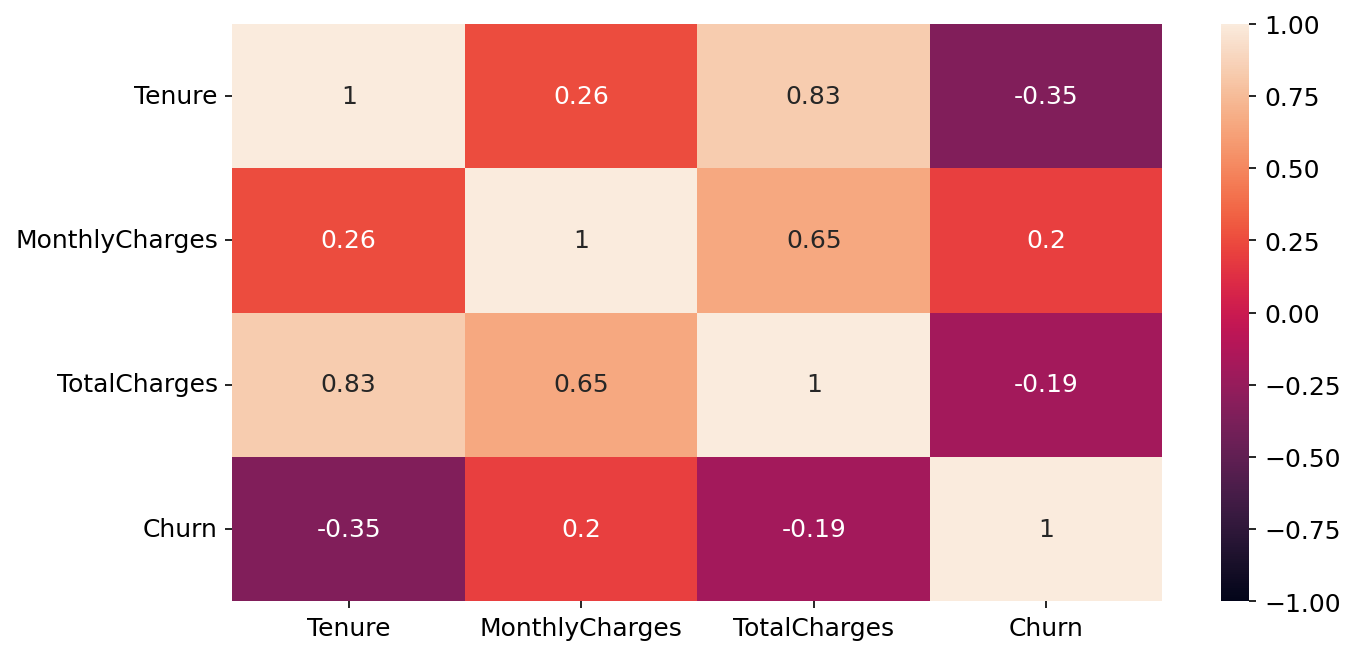

In [29]:
plt.figure(figsize = (10, 5))

sns.heatmap(corr_matrix, vmin= -1, vmax = 1, annot = True)
plt.show()

Insights

* A relação com o Tenure é negativa (-0.35). Estatisticamente, o tempo de permanência é o fator de maior peso na retenção. Isso confirma que o churn é mais agressivo entre clientes novos e tende a diminuir à medida que o cliente ultrapassa os primeiros meses de contrato.
* A correlação com MonthlyCharges é positiva (0.20). Embora moderada, existe uma relação direta entre o valor da fatura e a evasão. Isso indica que clientes com planos mais caros apresentam uma sensibilidade maior ao preço, elevando a probabilidade de churn conforme o ticket médio mensal sobe.
* A relação com TotalCharges é negativa (-0.19). Indica que clientes com menor receita acumulada têm maior propensão a sair. Essa variável possui altíssima correlação com o Tenure (0.83), esse insight reflete majoritariamente a saída precoce de clientes que ainda não tiveram tempo de gerar um faturamento acumulado expressivo.
* Devido a alta correlação entre Tenure e TotalCharges, sera mais proveitoso para o modelo de machine learning não trabalhar com as duas juntas.


Vamos investigar agora esses relacionamentos

In [ ]:
colors = [ '#4B0082', '#F2BB13'] 

fig, axes = plt.subplots(1, 3, figsize = (15, 3))
sns.scatterplot(data = df_train, x = 'Tenure', y = 'TotalCharges', hue ='Churn', ax= axes[0], palette = colors)
sns.scatterplot(data = df_train, x = 'MonthlyCharges', y = 'Tenure', hue = 'Churn', ax = axes[1], palette = colors)
sns.scatterplot(data = df_train, x = 'TotalCharges', y = 'MonthlyCharges', hue = 'Churn', ax = axes[2], palette = colors)
plt.tight_layout()
plt.show()


* Fica evidente que o grupo de maior risco são os clientes com baixo tempo de casa (Tenure) que estão pagando planos mais caros (MonthlyCharges). Esta combinação é um alerta para a equipe de retenção.

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
axes_list = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(data=df, x=col, kde=True, hue= 'Churn', ax=axes_list[i], palette = colors)
    
    axes_list[i].set_title(f'{col}')
    axes_list[i].set_xlabel('')

#ajuste para os títulos não baterem nos gráficos de cima
plt.tight_layout()
plt.show()


In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
axes = axes.flatten()

colors = [ '#4B0082', '#F2BB13'] 

for i, col in enumerate(numerical_features):
    sns.boxplot(data=df_train, x=target, y=col, ax=axes[i], hue=target, palette=colors, width=0.6,  legend = False)
        
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel('') 
    axes[i].set_ylabel('') 
                    
    axes[i].yaxis.grid(True, linestyle='-', alpha=0.3)
    sns.despine(ax=axes[i], left=True) 



Insigths:

* Os clientes mais recentes tiveram maior frequência de Churn
* Clientes com os planos mais baixo tem pouca taxa de Churn. E os clientes com planos mais caros tiveram alta aderência de Churn
* Os clientes que menos geraram receita(novos clientes), são os mais propensos a Churn.
  
### Variáveis categóricas

In [ ]:
import math

n_cols = 3
n_rows = math.ceil(len(categorical_columns) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, n_rows * 6))
axes_list = axes.flatten()

for i, col in enumerate(categorical_columns):
    prop_df = pd.crosstab(df_train[col], df_train[target], normalize='index') * 100

    prop_df.plot(kind='bar', stacked=True, ax=axes_list[i], 
                 color = [ '#4B0082', '#F2BB13'], alpha=0.8, legend=False)
    
    axes_list[i].set_ylabel('Porcentagem (%)')
    axes_list[i].set_xlabel(col)
    axes_list[i].tick_params(axis='x', rotation=0) 
    #axes_list[i].legend(title='Churn', loc='upper right')

for j in range(i + 1, len(axes_list)):
    fig.delaxes(axes_list[j])

plt.tight_layout() 
plt.show()

Insigths: 

* A maior incidência de Churn concentra-se em clientes solteiros (Partner: No) e sem dependentes. Este perfil apresenta menor barreira de saída e menor fidelização familiar, sugerindo a necessidade de pacotes que estimulem a inclusão de membros da família para aumentar o switching cost.
* Identificou-se que a maior taxa de evasão ocorre entre usuários de Fibra Óptica, apesar de ser a tecnologia de maior velocidade. Este insight é crítico: sugere que o alto valor da fatura ou instabilidades técnicas no serviço de fibra estão superando os benefícios da velocidade, exigindo uma revisão urgente da relação custo-benefício.
* Confirmando as expectativas de mercado, o contrato mensal é o principal preditor de Churn. A facilidade de rescisão e a ausência de multas tornam este grupo extremamente volátil, reforçando a estratégia de migração desses clientes para planos anuais ou bienais.
* Ao contrário do esperado, clientes com faturamento digital apresentam maior volume de Churn. Isso indica que a facilidade digital pode estar desumanizando a relação ou que erros em faturas eletrônicas não estão sendo resolvidos rapidamente, gerando frustração imediata.
* O maior alerta de cancelamento reside no método Electronic Check (Cheque Eletrônico), e não na transferência bancária automática. Clientes que utilizam métodos manuais ou digitais não automatizados tendem a ser mais conscientes do gasto mensal, o que facilita a decisão de cancelar o serviço diante de qualquer insatisfação.
* A posse de Multiple Lines não atua como um fator de retenção significativo. O comportamento de saída é consistente entre clientes com uma ou mais linhas, indicando que a decisão de Churn é motivada por fatores estruturais (contrato e preço) e não pela quantidade de serviços básicos de telefonia.
* Clientes que utilizam serviços de Tech Support e Device Protection apresentam taxas de Churn significativamente menores em comparação aos que não utilizam. Isso indica que serviços de valor agregado voltados à resolução de problemas técnicos são os maiores pilares de fidelização da base.
* A taxa de evasão entre Senior Citizens é quase o dobro da média dos demais clientes. Este grupo demanda uma investigação sobre a adequação dos canais de atendimento ou usabilidade dos serviços digitais.
* Embora populares, os serviços de Streaming (TV e Filmes) não impactam drasticamente a probabilidade de Churn. Eles funcionam como conveniência, mas não são o principal "gancho" de permanência do cliente como os serviços de suporte.
* Clientes sem serviço de internet (apenas telefonia fixa) são o segmento mais estável da empresa, com taxas de cancelamento residuais. O foco das estratégias de retenção deve, portanto, ser direcionado aos usuários de Fibra Óptica e DSL.

PROXIMOS PASSOS(TO DO LIST)
* Adcionair conclusões finais da EDA.
* Remover variaveis categorias inuteis das plotagens, tais como Gender, a propia Churn, 

## CONCLUSÕES DA EDA

A etapa de análise exploratória permitiu a identificação dos principais vetores de rotatividade (churn drivers) dentro da base de clientes. Os resultados indicam que a decisão de cancelamento está fundamentada em uma combinação de barreiras contratuais baixas, sensibilidade ao custo de tecnologias premium e eficácia de serviços de suporte.

Síntese dos Insights Críticos: 

* Vulnerabilidade Contratual e Temporal: O Churn é predominantemente impulsionado por clientes em fase de onboarding (baixo Tenure) sob o regime de contrato mensal (Month-to-month). A correlação negativa de -0.35 com o tempo de casa confirma que a retenção é crítica nos meses iniciais da jornada do cliente.
* Paradoxo da Tecnologia Premium: Identificou-se uma taxa de evasão atipicamente elevada entre usuários de Fibra Óptica. Este fenômeno sugere um desequilíbrio na percepção de custo-benefício, onde o ticket médio elevado (faixa de 70 a 90) ou possíveis instabilidades técnicas superam os ganhos de velocidade.
* Serviços de Valor Agregado (SVA) como Âncoras de Retenção: A adesão ao Tech Support e Device Protection atua como o fator de proteção mais eficaz contra a rotatividade. Diferente dos serviços de streaming, que possuem impacto marginal, o suporte técnico reduz drasticamente a probabilidade de cancelamento ao elevar o custo de mudança do cliente.
* Sensibilidade Financeira e Atrito no Pagamento: A correlação positiva (0.20) com as cobranças mensais indica uma elasticidade-preço relevante. Além disso, o método de pagamento via Electronic Check apresenta maior volatilidade, possivelmente devido ao maior engajamento manual e atrito no processo de faturamento.

Recomendações Estratégicas: 

* Estabilização da Receita: Implementar programas de incentivo para conversão de contratos mensais em planos de fidelidade (anuais/bienais) para novos entrantes.
* Otimização do LTV em Fibra Óptica: Revisar a estratégia de pricing ou a qualidade da entrega técnica para o segmento de fibra, visando mitigar a evasão nesse grupo de alta receita.
* Fidelização via Suporte: Integrar serviços de suporte técnico e segurança como componentes padrão em planos premium para aumentar o stickiness do cliente.